COMP5009 Assignment

# Loading our data into a train and test data frame

In [68]:
import sqlite3
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing as sk
pd.set_option('display.max_columns', None)

sqlFile = sqlite3.connect('Assignment2022.sqlite')
dfTrain = pd.read_sql_query("Select * from train", sqlFile)
dfTest = pd.read_sql_query("Select * from test", sqlFile)


Display the first and last 5 rows of our dataframe

In [69]:
dfTrain.head()

,index,Att00,Att01,Att02,Att03,Att04,Att05,Att06,Att07,Att08,Att09,Att10,Att11,Att12,Att13,Att14,Att15,Att16,Att17,Att18,Att19,Att20,Att21,Att22,Att23,Att24,Att25,Att26,Att27,Att28,Att29,class
0,0,26.813667,UGRY,14.161391,2038.452103,207172,-16.277958,45790,-21.053068,-439.332557,1003.543182,-16.457937,GLRW,YOYS,-2.008605,156.498498,-189.865507,153.316420,0,141.389247,-0.796627,108.918392,-2167.018655,-85.825924,NaN,225.761523,11.744882,0,-8310,61.243675,-305.733217,0.0
1,1,22.875573,UGRY,1.961014,454.118360,63863,875.461735,-88872,8.319632,-2501.922966,-190.613265,-21.430318,GLRW,EWIT,-10.515738,366.918979,-13.309397,21.230662,1,144.325587,42.844230,50.119574,-815.335683,-6.016318,-28.344064,-216.847209,-1.555845,0,-3197,245.096943,-21.431616,2.0
2,2,-20.840102,VMNM,8.075443,520.971404,228009,894.353099,-48591,-33.199606,1247.906930,498.199042,26.435841,GLRW,EWIT,-18.068660,921.591347,85.701052,87.427707,0,148.329688,43.768755,527.722445,-1005.977457,38.739906,NaN,-215.839204,-5.554295,0,-388,212.091370,138.001150,1.0
3,3,-3.567452,OPHU,-3.686299,1598.052728,-35235,-521.888672,24493,-5.726103,1717.567410,437.409592,-8.399678,XXUL,EWIT,-17.780789,-446.904866,188.428083,-39.909230,1,225.653322,-25.540715,21.025773,-976.263057,85.176157,8.514476,-177.288320,-3.958895,1,-51795,216.736598,303.418586,2.0
4,4,-8.387547,OPHU,-3.468309,1962.438704,356997,-531.815002,84401,1.896342,5620.037651,536.552496,19.802276,GLRW,NYFD,-28.201676,562.780102,-150.589838,-37.549190,0,94.585758,-26.026499,22.003716,-408.129585,-68.071933,NaN,-356.795683,-3.212005,0,-23200,322.232190,-242.489098,1.0


In [70]:
dfTrain.tail()

,index,Att00,Att01,Att02,Att03,Att04,Att05,Att06,Att07,Att08,Att09,Att10,Att11,Att12,Att13,Att14,Att15,Att16,Att17,Att18,Att19,Att20,Att21,Att22,Att23,Att24,Att25,Att26,Att27,Att28,Att29,class
4995,4995,24.960640,UGRY,13.981767,-4225.972151,-273020,-533.236646,112844,-24.134247,3813.491573,294.457086,11.572061,GLRW,EWIT,23.514095,-1287.992690,81.497433,151.371748,0,398.096595,-26.096073,403.768181,594.659921,36.839722,NaN,-125.053529,-3.510263,1,2593,501.562472,131.232221,2.0
4996,4996,-12.501681,UGRY,-0.660568,-4609.681778,-194965,-286.652335,-83262,4.202129,-179.302908,NaN,27.957133,GLRW,EWIT,-13.310701,-1088.766116,186.188518,-7.151555,1,296.125496,-14.028481,336.290120,-2104.120544,84.163795,NaN,-444.058863,3.618063,0,39926,67.111333,299.812301,1.0
4997,4997,-0.510129,OPHU,-2.645216,2100.628974,-37731,-630.846993,51644,14.325708,-3172.060985,-187.795537,18.833141,XXUL,EWIT,-38.549755,289.953459,14.665865,-28.638076,1,401.922735,-30.873027,262.577673,321.975505,6.629490,43.023916,33.338180,-2.605516,1,-29624,459.388684,23.615885,1.0
4998,4998,-7.954364,OPHU,10.326818,2707.675411,243189,915.661337,9334,1.066260,-1757.057918,956.647874,-27.095236,GLRW,EWIT,1.679117,1293.357769,158.626914,111.801929,0,190.417236,44.811559,627.350380,-1368.402980,71.704975,NaN,332.930214,2.609275,0,44774,148.769566,255.430896,2.0
4999,4999,-16.029486,UGRY,0.135759,3268.852196,-205858,-736.855549,58998,-19.658089,-5020.743672,-576.528068,-25.453128,XXUL,EWIT,-12.068440,578.221978,-31.822076,1.469775,0,215.776540,-36.060980,423.449282,1675.766428,-14.384704,NaN,-143.938205,-11.592120,1,-20133,622.216179,-51.241880,0.0


#Examining our data

In [71]:
print(dfTrain.columns)
print(dfTrain.dtypes)

Index(['index', 'Att00', 'Att01', 'Att02', 'Att03', 'Att04', 'Att05', 'Att06',
       'Att07', 'Att08', 'Att09', 'Att10', 'Att11', 'Att12', 'Att13', 'Att14',
       'Att15', 'Att16', 'Att17', 'Att18', 'Att19', 'Att20', 'Att21', 'Att22',
       'Att23', 'Att24', 'Att25', 'Att26', 'Att27', 'Att28', 'Att29', 'class'],
      dtype='object')
index      int64
Att00    float64
Att01     object
Att02    float64
Att03    float64
Att04      int64
Att05    float64
Att06      int64
Att07    float64
Att08    float64
Att09    float64
Att10    float64
Att11     object
Att12     object
Att13    float64
Att14    float64
Att15    float64
Att16    float64
Att17      int64
Att18    float64
Att19    float64
Att20    float64
Att21    float64
Att22    float64
Att23    float64
Att24    float64
Att25    float64
Att26      int64
Att27      int64
Att28    float64
Att29    float64
class    float64
dtype: object


In [72]:
dfTrain.shape

(5000, 32)

In [73]:
dfTrain.describe()

,index,Att00,Att02,Att03,Att04,Att05,Att06,Att07,Att08,Att09,Att10,Att13,Att14,Att15,Att16,Att17,Att18,Att19,Att20,Att21,Att22,Att23,Att24,Att25,Att26,Att27,Att28,Att29,class
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,4002.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2018.000000,5000.000000,4950.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2499.500000,-6.312763,0.556281,995.612039,-12966.88980,-117.730397,26487.146800,-3.473852,419.996004,114.936608,0.290723,0.380247,74.183985,59.543026,6.022505,0.438200,244.699388,-5.761609,335.626708,-333.706760,26.915553,0.533232,-66.252237,-1.846782,0.505000,8.860400,334.735973,95.879873,1.296000
std,1443.520003,22.428647,5.553306,2539.794005,156581.25176,716.424306,81890.860471,15.135337,3411.119865,609.888566,23.781261,23.689826,838.843513,153.886202,60.122130,0.496216,141.289322,35.061096,193.450075,1381.662443,69.562006,23.644282,297.823545,6.436245,0.500025,22320.439634,194.332922,247.797108,0.782628
min,0.000000,-93.712962,-17.622385,-7968.072236,-579939.00000,-3613.094151,-352112.000000,-65.581255,-11794.169006,-2514.113165,-83.264014,-98.145018,-3006.908867,-472.874960,-190.786415,0.000000,0.000000,-176.821248,0.000000,-5375.171876,-213.756206,-75.140130,-1065.666330,-28.655866,0.000000,-76858.000000,0.000000,-761.452593,0.000000
25%,1249.750000,-20.756679,-3.236416,-669.128183,-118383.25000,-600.515878,-28429.000000,-13.824762,-1886.275493,-276.588345,-15.729846,-15.689594,-486.509844,-47.040719,-35.038631,0.000000,122.948138,-29.388652,168.420106,-1269.699701,-21.264069,-15.089263,-270.238596,-6.167413,0.000000,-15118.250000,167.197678,-75.747884,1.000000
50%,2499.500000,-6.652937,0.414730,1034.884503,-12829.00000,-97.334905,27152.000000,-4.060381,477.988099,135.967473,0.443574,0.614642,68.997195,57.107423,4.490016,0.000000,244.695046,-4.763474,335.862270,-345.600864,25.814575,0.319282,-64.859584,-1.986168,1.000000,147.500000,333.784141,91.957915,1.000000
75%,3749.250000,8.202078,4.267333,2683.382131,89713.50000,370.389001,81367.250000,6.215733,2727.238046,522.956451,16.228520,16.401468,617.325751,164.664060,46.199714,1.000000,367.331754,18.126471,503.182190,605.344258,74.433979,16.010199,136.743698,2.279696,1.000000,14589.250000,503.915647,265.152283,2.000000
max,4999.000000,79.611908,22.501276,11287.762496,543677.00000,2348.613622,394089.000000,53.135822,14844.025326,2396.374530,80.836636,91.000488,3360.745928,648.423131,243.607076,1.000000,489.301112,114.938824,672.213511,4502.618662,293.110187,72.993511,1011.098242,25.543061,1.000000,92169.000000,672.091268,1044.131147,2.000000


In [74]:
# Another description of our dataframe
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   5000 non-null   int64  
 1   Att00   5000 non-null   float64
 2   Att01   5000 non-null   object 
 3   Att02   5000 non-null   float64
 4   Att03   5000 non-null   float64
 5   Att04   5000 non-null   int64  
 6   Att05   5000 non-null   float64
 7   Att06   5000 non-null   int64  
 8   Att07   5000 non-null   float64
 9   Att08   5000 non-null   float64
 10  Att09   4002 non-null   float64
 11  Att10   5000 non-null   float64
 12  Att11   5000 non-null   object 
 13  Att12   5000 non-null   object 
 14  Att13   5000 non-null   float64
 15  Att14   5000 non-null   float64
 16  Att15   5000 non-null   float64
 17  Att16   5000 non-null   float64
 18  Att17   5000 non-null   int64  
 19  Att18   5000 non-null   float64
 20  Att19   5000 non-null   float64
 21  Att20   5000 non-null   float64
 22  

In [75]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   500 non-null    int64  
 1   Att00   500 non-null    float64
 2   Att01   500 non-null    object 
 3   Att02   500 non-null    float64
 4   Att03   500 non-null    float64
 5   Att04   500 non-null    int64  
 6   Att05   500 non-null    float64
 7   Att06   500 non-null    int64  
 8   Att07   500 non-null    float64
 9   Att08   500 non-null    float64
 10  Att09   500 non-null    float64
 11  Att10   500 non-null    float64
 12  Att11   500 non-null    object 
 13  Att12   500 non-null    object 
 14  Att13   500 non-null    float64
 15  Att14   500 non-null    float64
 16  Att15   500 non-null    float64
 17  Att16   500 non-null    float64
 18  Att17   500 non-null    int64  
 19  Att18   500 non-null    float64
 20  Att19   500 non-null    float64
 21  Att20   500 non-null    float64
 22  At

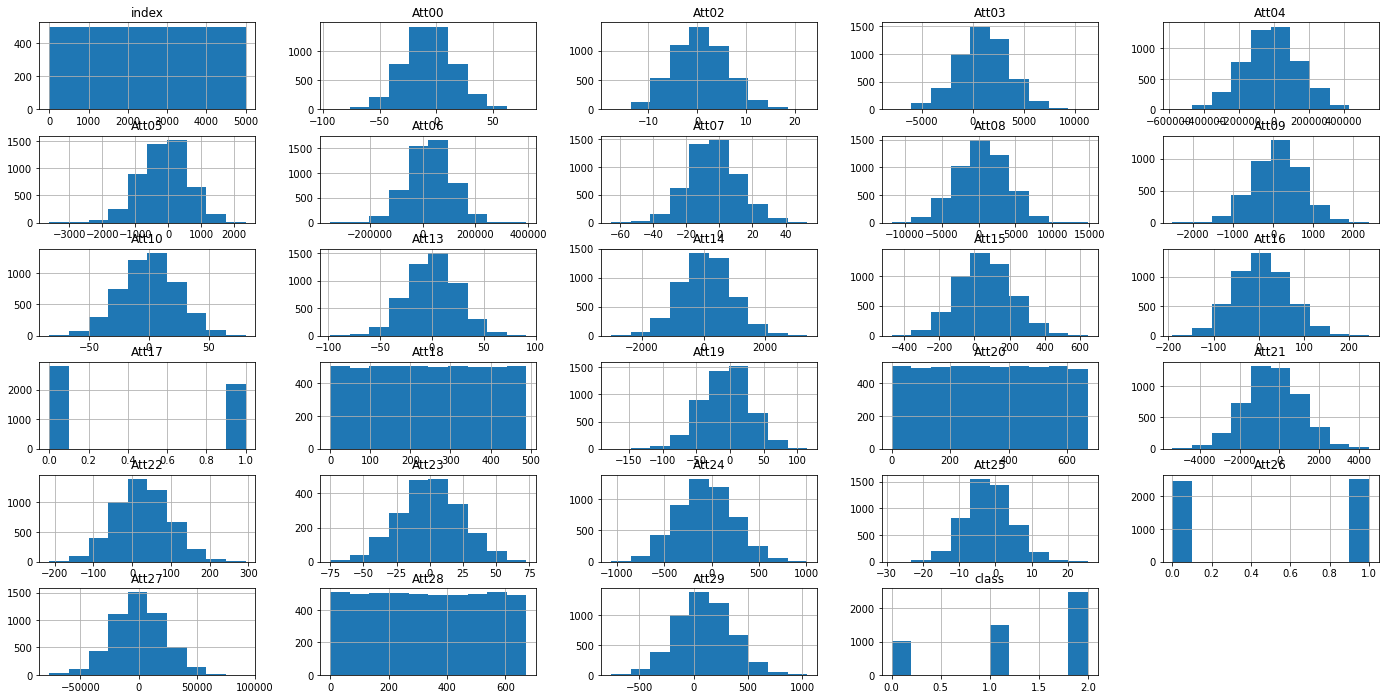

In [76]:
dfTrain.hist(figsize=(24,12))
plt.show()

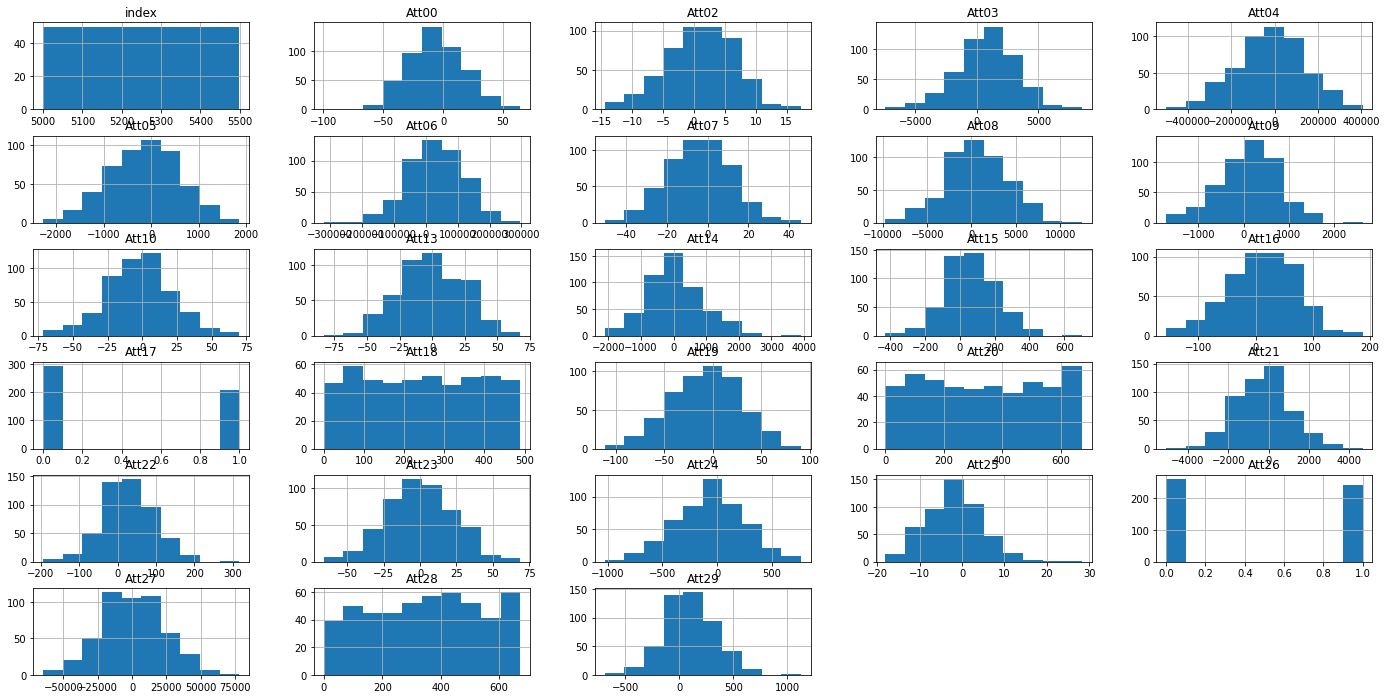

In [77]:
dfTest.hist(figsize=(24,12))
plt.show()

In [78]:
# Checking this columns based on histogram plot
dfTrain[['Att00','Att10','Att13','Att16','Att22']].describe()

,Att00,Att10,Att13,Att16,Att22
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,-6.312763,0.290723,0.380247,6.022505,26.915553
std,22.428647,23.781261,23.689826,60.122130,69.562006
min,-93.712962,-83.264014,-98.145018,-190.786415,-213.756206
25%,-20.756679,-15.729846,-15.689594,-35.038631,-21.264069
50%,-6.652937,0.443574,0.614642,4.490016,25.814575
75%,8.202078,16.228520,16.401468,46.199714,74.433979
max,79.611908,80.836636,91.000488,243.607076,293.110187


In [79]:
# Check if they contain the same values
dfTrain['Att00'].equals(dfTrain['Att10'])
dfTrain['Att00'].equals(dfTrain['Att13'])
dfTrain['Att10'].equals(dfTrain['Att13'])
dfTrain['Att16'].equals(dfTrain['Att22'])

False

## List the percentage of missing values for each attribute

In [80]:
def list_missing(df):
  total = df.shape[0]
  for attribute in df.columns:
    missing = df[attribute].isna().sum()
    print(f"{attribute}: {missing/total*100}")

In [81]:
list_missing(dfTrain)

index: 0.0
Att00: 0.0
Att01: 0.0
Att02: 0.0
Att03: 0.0
Att04: 0.0
Att05: 0.0
Att06: 0.0
Att07: 0.0
Att08: 0.0
Att09: 19.96
Att10: 0.0
Att11: 0.0
Att12: 0.0
Att13: 0.0
Att14: 0.0
Att15: 0.0
Att16: 0.0
Att17: 0.0
Att18: 0.0
Att19: 0.0
Att20: 0.0
Att21: 0.0
Att22: 0.0
Att23: 59.64
Att24: 0.0
Att25: 1.0
Att26: 0.0
Att27: 0.0
Att28: 0.0
Att29: 0.0
class: 0.0


## List percentage of unique values for each attribute

In [82]:
def list_unique(df):
  total = df.shape[0]
  for attribute in df.columns:
    unique = df[attribute].nunique()
    print(f"{attribute}: {unique/total*100}")

In [83]:
list_unique(dfTrain)

index: 100.0
Att00: 98.02
Att01: 0.13999999999999999
Att02: 98.02
Att03: 98.02
Att04: 97.5
Att05: 98.02
Att06: 97.06
Att07: 98.02
Att08: 98.02
Att09: 78.78
Att10: 98.02
Att11: 0.06
Att12: 0.2
Att13: 98.02
Att14: 98.02
Att15: 98.02
Att16: 98.02
Att17: 0.04
Att18: 100.0
Att19: 98.02
Att20: 100.0
Att21: 98.02
Att22: 98.02
Att23: 40.08
Att24: 98.02
Att25: 97.1
Att26: 0.04
Att27: 94.98
Att28: 100.0
Att29: 98.02
class: 0.06


In [84]:
list_unique(dfTest)

index: 100.0
Att00: 100.0
Att01: 1.2
Att02: 100.0
Att03: 100.0
Att04: 100.0
Att05: 100.0
Att06: 99.8
Att07: 100.0
Att08: 100.0
Att09: 100.0
Att10: 100.0
Att11: 0.4
Att12: 1.7999999999999998
Att13: 100.0
Att14: 100.0
Att15: 100.0
Att16: 100.0
Att17: 0.4
Att18: 100.0
Att19: 100.0
Att20: 100.0
Att21: 100.0
Att22: 100.0
Att23: 100.0
Att24: 100.0
Att25: 100.0
Att26: 0.4
Att27: 99.8
Att28: 100.0
Att29: 100.0
class: 0.0


In [85]:
# List the count of unique values for Att01, Att11 and Att12 for Train and Test models
dfTrain.value_counts('Att01')

Att01
OPHU    2109
UGRY    1846
EEVW     560
VMNM     427
OMJC      33
QDOP      24
HIWU       1
dtype: int64

In [86]:
dfTest.value_counts('Att01')

Att01
OPHU    198
UGRY    193
EEVW     60
VMNM     43
OMJC      3
QDOP      3
dtype: int64

In [87]:
dfTrain.value_counts('Att11')

Att11
GLRW    3098
XXUL    1901
KIKU       1
dtype: int64

In [88]:
dfTest.value_counts('Att11')

Att11
GLRW    309
XXUL    191
dtype: int64

In [89]:
dfTrain.value_counts('Att12')

Att12
EWIT    1729
NYFD    1514
YOYS     815
GECO     594
YDNM     203
EMDF     104
YDSF      23
RWTB      14
RNJC       3
NZEZ       1
dtype: int64

In [90]:
dfTest.value_counts('Att12')

Att12
NYFD    165
EWIT    152
YOYS     71
GECO     69
YDNM     27
EMDF     10
YDSF      3
RWTB      2
RNJC      1
dtype: int64

## Now we look for duplicate rows and remove them if any

In [91]:
dups = dfTrain.duplicated()
dups.sum()

0

In [92]:
list_missing(dfTrain)

index: 0.0
Att00: 0.0
Att01: 0.0
Att02: 0.0
Att03: 0.0
Att04: 0.0
Att05: 0.0
Att06: 0.0
Att07: 0.0
Att08: 0.0
Att09: 19.96
Att10: 0.0
Att11: 0.0
Att12: 0.0
Att13: 0.0
Att14: 0.0
Att15: 0.0
Att16: 0.0
Att17: 0.0
Att18: 0.0
Att19: 0.0
Att20: 0.0
Att21: 0.0
Att22: 0.0
Att23: 59.64
Att24: 0.0
Att25: 1.0
Att26: 0.0
Att27: 0.0
Att28: 0.0
Att29: 0.0
class: 0.0


#Replace missing values with mean

In [93]:
# Fill Att09 and Att25 with the mean
dfTrain['Att09'].fillna(dfTrain['Att09'].mean(), inplace = True)
dfTrain['Att25'].fillna(dfTrain['Att25'].mean(), inplace = True)


## Dropping columns - index and the string attributes


In [94]:
# We will drop attribute 01, 11, 12, 23 and index columns
dfTrain.drop(columns=['Att01', 'Att11', 'Att12', 'Att23', 'index'], inplace=True)
dfTrain.columns

Index(['Att00', 'Att02', 'Att03', 'Att04', 'Att05', 'Att06', 'Att07', 'Att08',
       'Att09', 'Att10', 'Att13', 'Att14', 'Att15', 'Att16', 'Att17', 'Att18',
       'Att19', 'Att20', 'Att21', 'Att22', 'Att24', 'Att25', 'Att26', 'Att27',
       'Att28', 'Att29', 'class'],
      dtype='object')

In [95]:
# Repeat for Test columns
dfTest.drop(columns=['Att01', 'Att11', 'Att12', 'Att23', 'index'], inplace=True)
dfTest.columns

Index(['Att00', 'Att02', 'Att03', 'Att04', 'Att05', 'Att06', 'Att07', 'Att08',
       'Att09', 'Att10', 'Att13', 'Att14', 'Att15', 'Att16', 'Att17', 'Att18',
       'Att19', 'Att20', 'Att21', 'Att22', 'Att24', 'Att25', 'Att26', 'Att27',
       'Att28', 'Att29', 'class'],
      dtype='object')

In [96]:
dfTrain.keys()

Index(['Att00', 'Att02', 'Att03', 'Att04', 'Att05', 'Att06', 'Att07', 'Att08',
       'Att09', 'Att10', 'Att13', 'Att14', 'Att15', 'Att16', 'Att17', 'Att18',
       'Att19', 'Att20', 'Att21', 'Att22', 'Att24', 'Att25', 'Att26', 'Att27',
       'Att28', 'Att29', 'class'],
      dtype='object')

In [97]:
# Convert Binary values column to integer data type
dfTrain['class'] = dfTrain['class'].astype(int)
dfTrain['class'].dtypes

dtype('int64')

# Standard Scaling

In [98]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Create a standard scaler
scaler = StandardScaler()
# List of non binary numeric attributes
cols_to_scale = ['Att00', 'Att02', 'Att03', 'Att04', 'Att05', 'Att06', 'Att07', 'Att08',
       'Att09', 'Att10', 'Att13', 'Att14', 'Att15', 'Att16', 'Att19', 'Att21', 'Att22', 
       'Att24', 'Att25', 'Att27', 'Att29']
# Determine the mean/std for each column and set up the scaler
scaler.fit(dfTrain[cols_to_scale])

# Now transform our data using this scaler, replacing the original data
dfTrain[cols_to_scale] =  scaler.transform(dfTrain[cols_to_scale])
# if you have other data frames that you want to scale with the same transform you can do it as
# other_df[numeric_attributes] = scaler.transform(other_df[numeric_attributes])

In [99]:
# Repeat for Test Data
# Create a standard scaler
scaler = StandardScaler()
# List of non binary numeric attributes
cols_to_scale = ['Att00', 'Att02', 'Att03', 'Att04', 'Att05', 'Att06', 'Att07', 'Att08',
       'Att09', 'Att10', 'Att13', 'Att14', 'Att15', 'Att16', 'Att19', 'Att21', 'Att22', 
       'Att24', 'Att25', 'Att27', 'Att29']
# Determine the mean/std for each column and set up the scaler
scaler.fit(dfTest[cols_to_scale])

# Now transform our data using this scaler, replacing the original data
dfTest[cols_to_scale] =  scaler.transform(dfTest[cols_to_scale])
# if you have other data frames that you want to scale with the same transform you can do it as
# other_df[numeric_attributes] = scaler.transform(other_df[numeric_attributes])

# MinMax Scaling

In [100]:
scaler = MinMaxScaler()
cols_to_scale = ['Att18', 'Att20', 'Att28']

scaler.fit(dfTrain[cols_to_scale])
dfTrain[cols_to_scale] =  scaler.transform(dfTrain[cols_to_scale])

In [101]:
# Repeat for Test Data
scaler = MinMaxScaler()
cols_to_scale = ['Att18', 'Att20', 'Att28']

scaler.fit(dfTest[cols_to_scale])
dfTest[cols_to_scale] =  scaler.transform(dfTest[cols_to_scale])

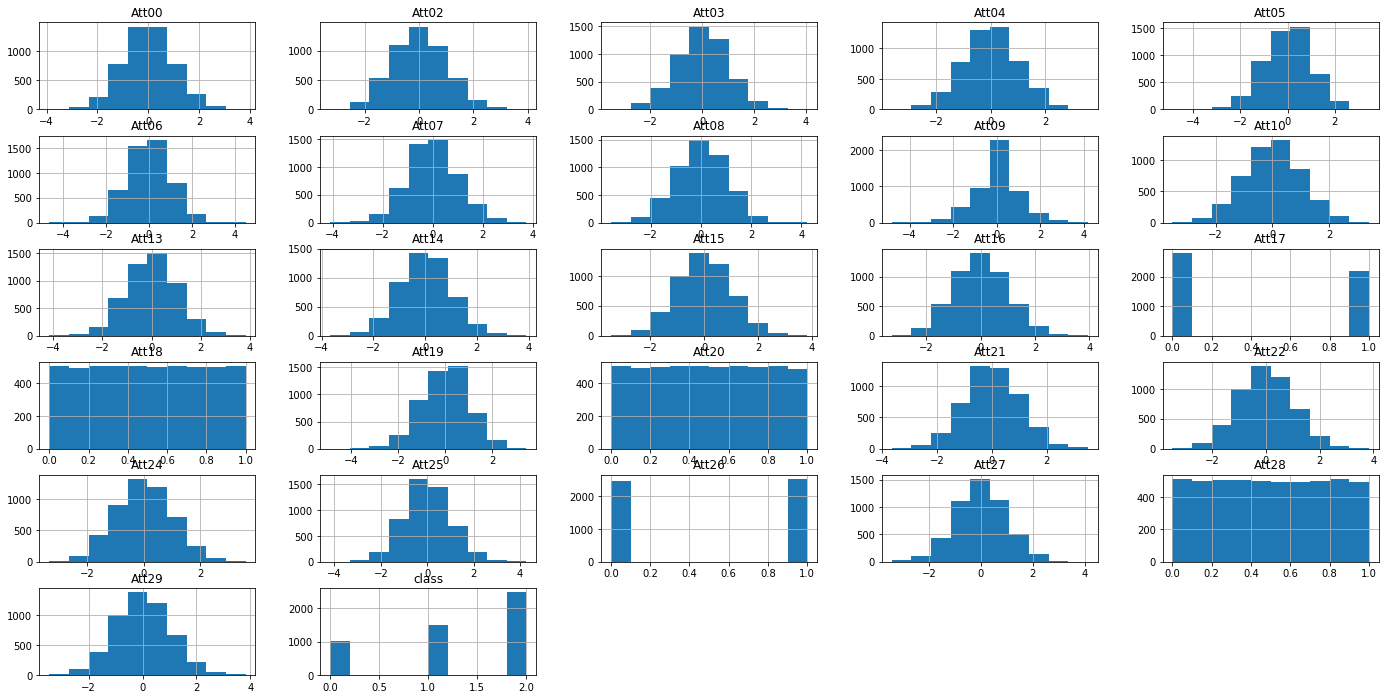

In [102]:
dfTrain.hist(figsize=(24,12))
plt.show()

# Splitting training data

In [103]:
# assign dataframe to X_df
X_df = dfTrain.loc[:, dfTrain.columns != 'class']

# X_df.keys()

In [104]:
# convert df to array
y_arr = dfTrain['class'].values


# Correlation Matrix

In [105]:
import seaborn as sns

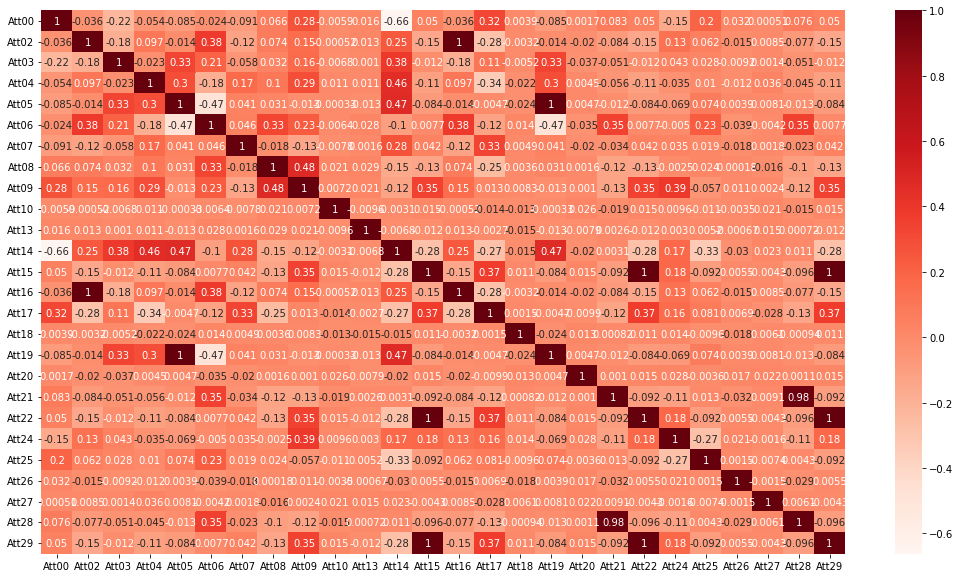

In [106]:
# Calculate the correlation between each attribute
cor = X_df.corr()
plt.figure(figsize=(18,10))
sns.heatmap(X_df.corr(), annot=True, cmap=plt.cm.Reds)

## Dropping columns with high correlation

In [107]:
# Dropping columns with correlation above 95%
cols_to_drop = ['Att16', 'Att19', 'Att22', 'Att28', 'Att29']
X_df.drop(columns=cols_to_drop, inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [108]:
X_df.columns

Index(['Att00', 'Att02', 'Att03', 'Att04', 'Att05', 'Att06', 'Att07', 'Att08',
       'Att09', 'Att10', 'Att13', 'Att14', 'Att15', 'Att17', 'Att18', 'Att20',
       'Att21', 'Att24', 'Att25', 'Att26', 'Att27'],
      dtype='object')

In [109]:
cols_to_drop = ['Att16', 'Att19', 'Att22', 'Att28', 'Att29']
dfTest.drop(columns=cols_to_drop, inplace=True)
dfTest.columns

Index(['Att00', 'Att02', 'Att03', 'Att04', 'Att05', 'Att06', 'Att07', 'Att08',
       'Att09', 'Att10', 'Att13', 'Att14', 'Att15', 'Att17', 'Att18', 'Att20',
       'Att21', 'Att24', 'Att25', 'Att26', 'Att27', 'class'],
      dtype='object')

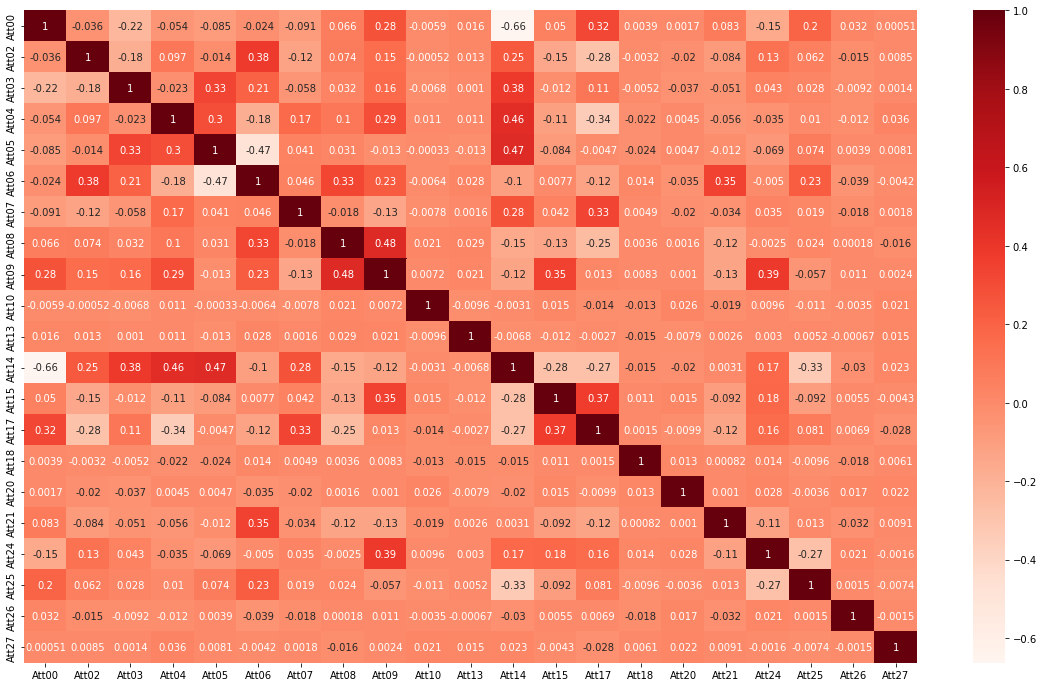

In [110]:
cor = X_df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(X_df.corr(), annot=True, cmap=plt.cm.Reds)

# Imbalance Class

In [111]:
dfTrain['class'].value_counts()

2    2490
1    1500
0    1010
Name: class, dtype: int64

## Undersampling with n = 1010

In [112]:
from imblearn.under_sampling import RandomUnderSampler

sampler = RandomUnderSampler(random_state=42, replacement=True)
X_sampler, y_sampler = sampler.fit_resample(X_df, y_arr)

# Split Train Data to Model-building Data and Validation Data

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sampler, y_sampler,
                                                    test_size=0.25, # use a teste sieve of 25%
                                                    random_state=4) # this random state ensures that we get the same subset each time we call this cell

# Knn neighbours

In [114]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold, ShuffleSplit, KFold

In [115]:
# Cross Validation from Prac05
# This is random sampling
ss = ShuffleSplit(n_splits=10, test_size=15, random_state=4)
# This is non-random sampling, we just break the data in to 10 contiguous sub-sets
kf = KFold(n_splits=10)
# Ensuring the balance between classes in the model/validate sets
# means we should use stratified sampling
skf = StratifiedKFold(n_splits=10)


In [132]:
# Knn from PRac05

# Create a dictionary of all the parameters we'll be iterating over
parameters = {'weights': ['uniform','distance'], # this should be the different weighting schemes
              'n_neighbors':[1,3,7,11,17,21]} # this should be a list of the nearest neigbhours
# make a classifier object
knn = KNeighborsClassifier()
# create a GridSearchCV object to do the training with cross validation
gscv = GridSearchCV(estimator=knn,
                    param_grid=parameters,
                    cv=skf,  # the cross validation folding pattern
                    scoring='accuracy')
# now train our model
best_knn = gscv.fit(X_train, y_train)

In [133]:
best_knn.best_params_, best_knn.best_score_

({'n_neighbors': 17, 'weights': 'distance'}, 0.8868923409846202)

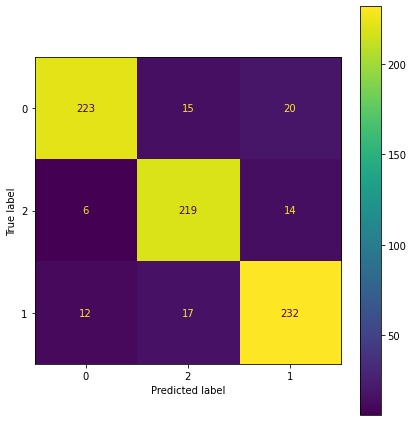

In [137]:
fig, ax = plt.subplots(1,1, figsize=(6, 6))

ConfusionMatrixDisplay.from_estimator(best_knn,
                                      X_test, y_test,
                                      display_labels=dfTrain['class'],
                                      ax=ax)
plt.tight_layout()
plt.show()

# Decision Tree Classifier

In [118]:
from sklearn import tree

parameters = {'criterion': ('gini','entropy'),  # this should be the different splitting criteria
              'min_samples_split':[3,10,15,20]} # this should be the different values for min_samples_split
dtc = tree.DecisionTreeClassifier()
gscv = GridSearchCV(estimator=dtc,
                    param_grid=parameters,
                    cv=5,
                    scoring='accuracy')
best_dtc = gscv.fit(X_train, y_train)
best_dtc.best_params_, best_dtc.best_score_



({'criterion': 'entropy', 'min_samples_split': 3}, 0.7539633054170498)

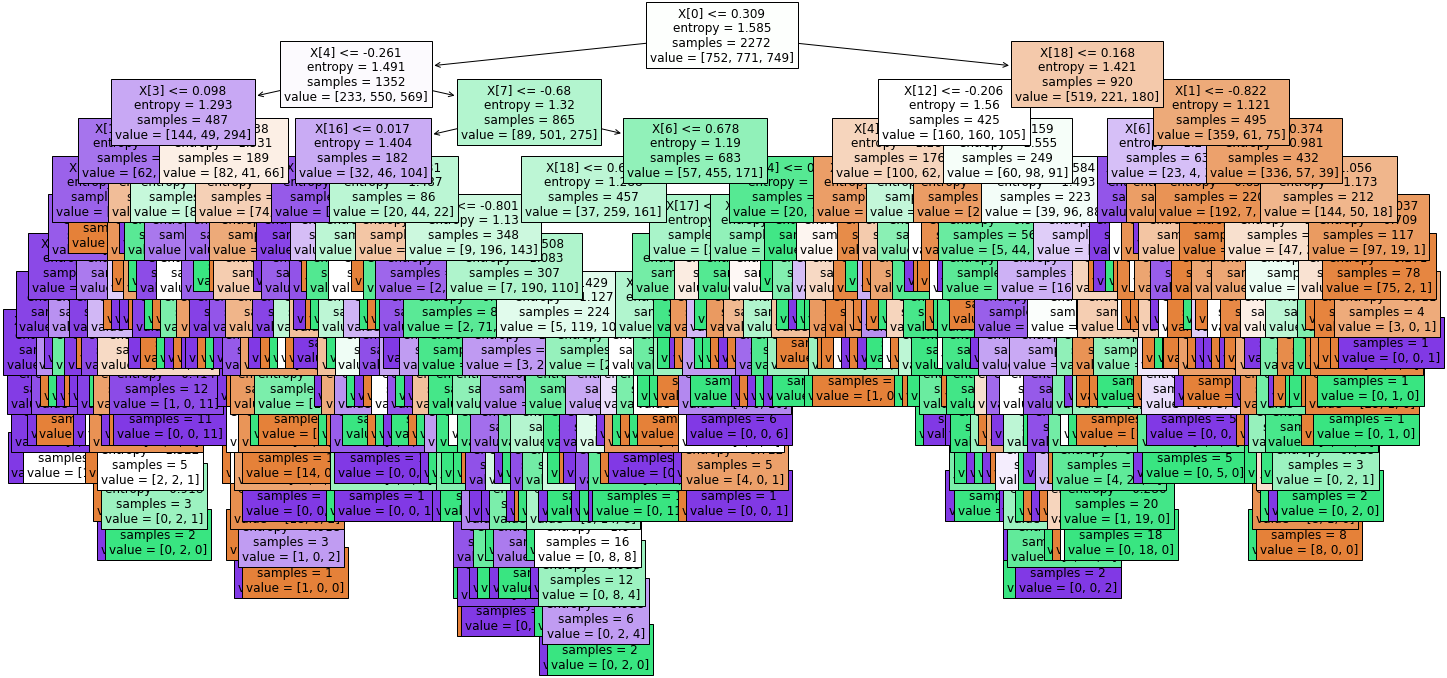

In [139]:
fig, ax = plt.subplots(1,1, figsize=(24,12))
tree.plot_tree(best_dtc.best_estimator_, 
               filled=True, # color the nodes based on class/purity
               ax=ax, fontsize=12)
plt.show()

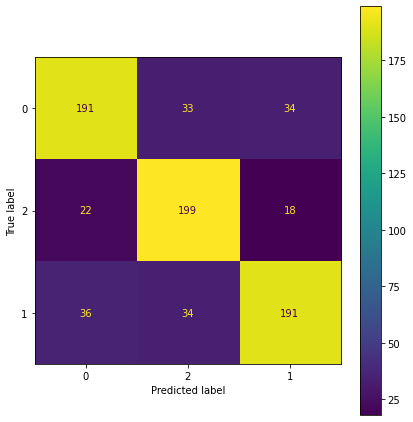

In [162]:
fig, ax = plt.subplots(1,1, figsize=(6, 6))

ConfusionMatrixDisplay.from_estimator(best_dtc.best_estimator_,
                                      X_test, y_test,
                                      display_labels=dfTrain['class'],
                                      ax=ax)
plt.tight_layout()
plt.show()

# Naive Bayes Classifier

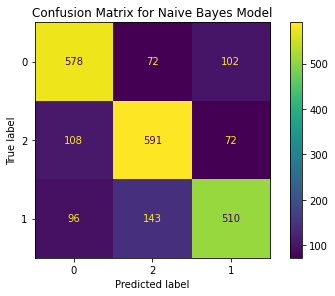

In [119]:
from sklearn import naive_bayes

# no parameters to adjust so no need to optimise, just train
fig, ax = plt.subplots(1,1)
nb = naive_bayes.GaussianNB()
nb.fit(X_train, y_train)
ConfusionMatrixDisplay.from_estimator(nb,
                                      X_train, y_train,
                                      display_labels=dfTrain['class'],
                                      ax=ax)
plt.tight_layout()
plt.title('Confusion Matrix for Naive Bayes Model')
plt.show()

In [120]:
y_pred = nb.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred))

0.7389964788732394


# Predicting Test Data with Knn and Decision Tree

In [123]:
dfTest = dfTest.drop('class', axis=1)

In [124]:
# 
KNN_model = best_knn.predict(dfTest)
KNN_model

array([1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 2, 0, 1, 2, 2, 1,
       2, 1, 2, 1, 2, 0, 2, 2, 2, 1, 1, 1, 0, 2, 2, 2, 0, 2, 1, 2, 1, 2,
       2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1, 1, 0, 1, 2, 2, 1, 1, 2, 1,
       2, 2, 0, 0, 1, 1, 2, 0, 0, 2, 0, 2, 2, 2, 1, 0, 1, 0, 2, 2, 1, 2,
       1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 0, 2, 2, 1, 2, 1, 1, 1, 1, 0, 0, 2,
       1, 0, 0, 0, 0, 1, 0, 2, 1, 2, 2, 0, 2, 2, 1, 1, 2, 0, 0, 1, 0, 2,
       2, 0, 1, 0, 2, 2, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2,
       0, 0, 1, 1, 2, 1, 1, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 0, 2, 1, 2, 2,
       2, 1, 2, 2, 1, 1, 1, 2, 0, 1, 0, 1, 2, 2, 2, 1, 2, 0, 1, 1, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 2, 2, 2, 2, 2, 1, 1, 2,
       0, 2, 1, 2, 1, 2, 0, 0, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2,
       0, 1, 2, 1, 2, 1, 2, 2, 0, 0, 2, 1, 2, 0, 0, 1, 1, 2, 2, 1, 2, 1,
       1, 1, 2, 1, 2, 0, 2, 2, 2, 1, 1, 0, 2, 2, 2, 1, 1, 0, 2, 0, 2, 0,
       1, 2, 2, 2, 1, 1, 2, 1, 0, 1, 0, 1, 1, 2, 2,

In [125]:
DTC_model = best_dtc.predict(dfTest)
DTC_model

array([0, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1,
       2, 1, 2, 2, 2, 0, 2, 1, 1, 0, 1, 1, 0, 2, 2, 2, 0, 2, 1, 0, 0, 2,
       0, 1, 0, 2, 1, 1, 2, 2, 0, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 0, 2,
       2, 2, 1, 0, 1, 1, 0, 1, 0, 2, 0, 0, 2, 1, 1, 0, 1, 0, 1, 2, 0, 2,
       1, 1, 2, 0, 2, 2, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 1, 1, 1, 0, 1, 2,
       1, 1, 0, 0, 0, 1, 0, 2, 1, 2, 1, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0, 2,
       1, 2, 1, 2, 2, 2, 1, 1, 0, 0, 0, 2, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0,
       2, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 0,
       2, 1, 2, 2, 1, 1, 2, 2, 0, 1, 0, 1, 2, 0, 2, 0, 2, 2, 1, 0, 1, 1,
       1, 0, 0, 2, 2, 2, 2, 2, 0, 2, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 1, 2, 1, 0, 0, 0, 2, 2, 2, 1, 0, 0, 1, 1, 2, 2, 2, 2, 1, 2,
       2, 1, 2, 2, 2, 1, 0, 2, 0, 0, 1, 1, 2, 0, 0, 1, 1, 2, 0, 1, 0, 1,
       0, 2, 2, 1, 0, 0, 0, 2, 1, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0,
       1, 2, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 2,

In [158]:
index5000 = []
for i in range(5000, 5500):
  index5000.append(i)
index5000

dfPredicted = pd.DataFrame(index5000, columns = ['index'], dtype=int)

dfPredicted['Predict1'] = KNN_model
dfPredicted['Predict2'] = DTC_model
dfPredicted.set_index('index')

,Predict1,Predict2
index,,
5000,1,0
5001,2,2
5002,2,2
5003,1,1
5004,2,1
...,...,...
5495,2,0
5496,2,2
5497,1,1


In [140]:
dfPredicted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Index     500 non-null    int64
 1   Predict1  500 non-null    int64
 2   Predict2  500 non-null    int64
dtypes: int64(3)
memory usage: 11.8 KB


In [160]:
con = sqlite3.connect('Answers.sqlite')
dfPredicted.to_sql(name='Test Data Predictions', con=con)
con.close()